IMPORTING LIBARIES


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset# downloaded from bright data
we can download from this link
https://brightdata.com/cp/data_api/gd_lyclm20il4r5helnj?id=hl_ea87b580&tab=overview

In [41]:
df = pd.read_csv('/content/Instagram - Reels.csv')

Create sentiment labels based on likes

In [42]:
df['sentiment'] = pd.cut(df['likes'], bins=[0,
                        df['likes'].quantile(0.33),
                         df['likes'].quantile(0.66),
                          float('inf')],
                          labels=['negative', 'neutral', 'positive'])

Handle NaN values in 'hashtags' column

In [43]:
df['hashtags'] = df['hashtags'].fillna('')

Creating features and target

In [44]:
x = df['hashtags']
y = df['sentiment']

Handle NaN values in target variable

In [45]:
y = y.cat.add_categories('unknown').fillna('unknown')

Split the data

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Vectorize the text

In [47]:
vectorizer = CountVectorizer(stop_words='english')
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

Train the model

In [48]:
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

MultinomialNB()

Make predictions

In [49]:
y_pred = model.predict(x_test_vectorized)

Evaluate the model

In [51]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.395
Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.24      0.37        70
     neutral       0.41      0.21      0.27        63
    positive       0.34      0.77      0.47        64
     unknown       0.00      0.00      0.00         3

    accuracy                           0.40       200
   macro avg       0.38      0.30      0.28       200
weighted avg       0.51      0.40      0.36       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualizations

1. Sentiment Distribution

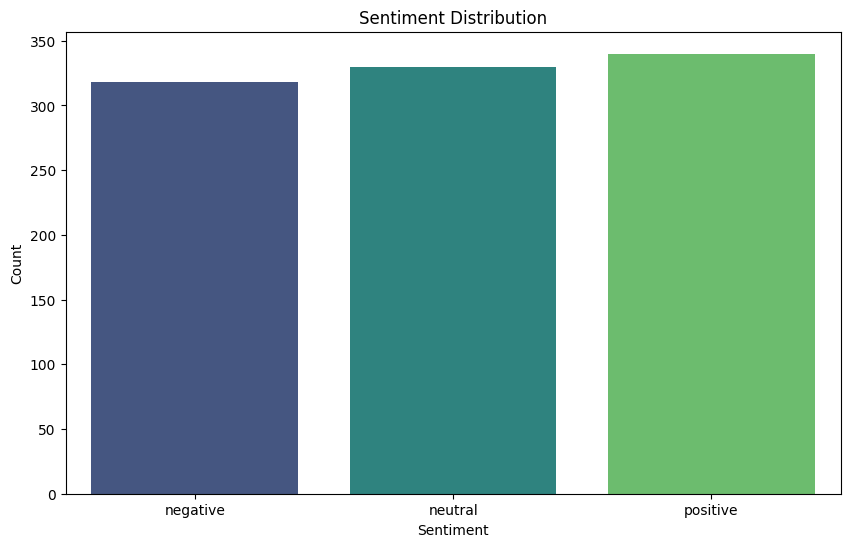

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='viridis', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

2. Confusion Matrix

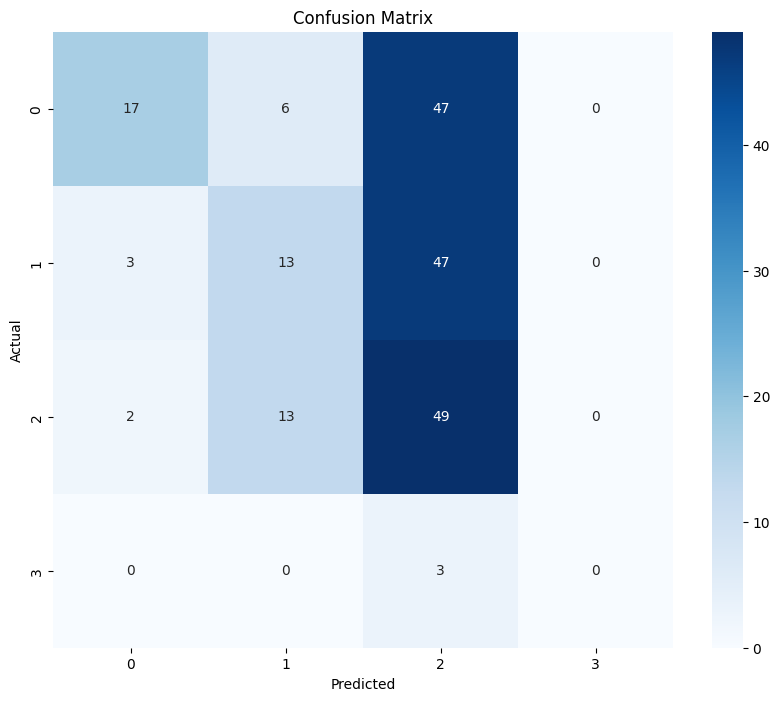

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. Positive vs Negative Segregation

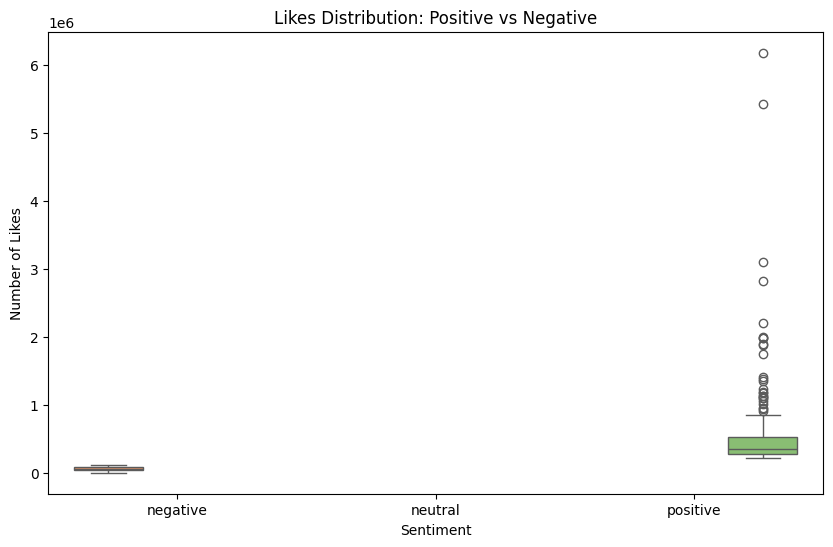

In [55]:
pos_neg_df = df[df['sentiment'].isin(['positive', 'negative'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='likes', data=pos_neg_df, hue='sentiment', palette='RdYlGn', legend=False)
plt.title('Likes Distribution: Positive vs Negative')
plt.xlabel('Sentiment')
plt.ylabel('Number of Likes')
plt.show()

 4. Top Words for Each Sentiment

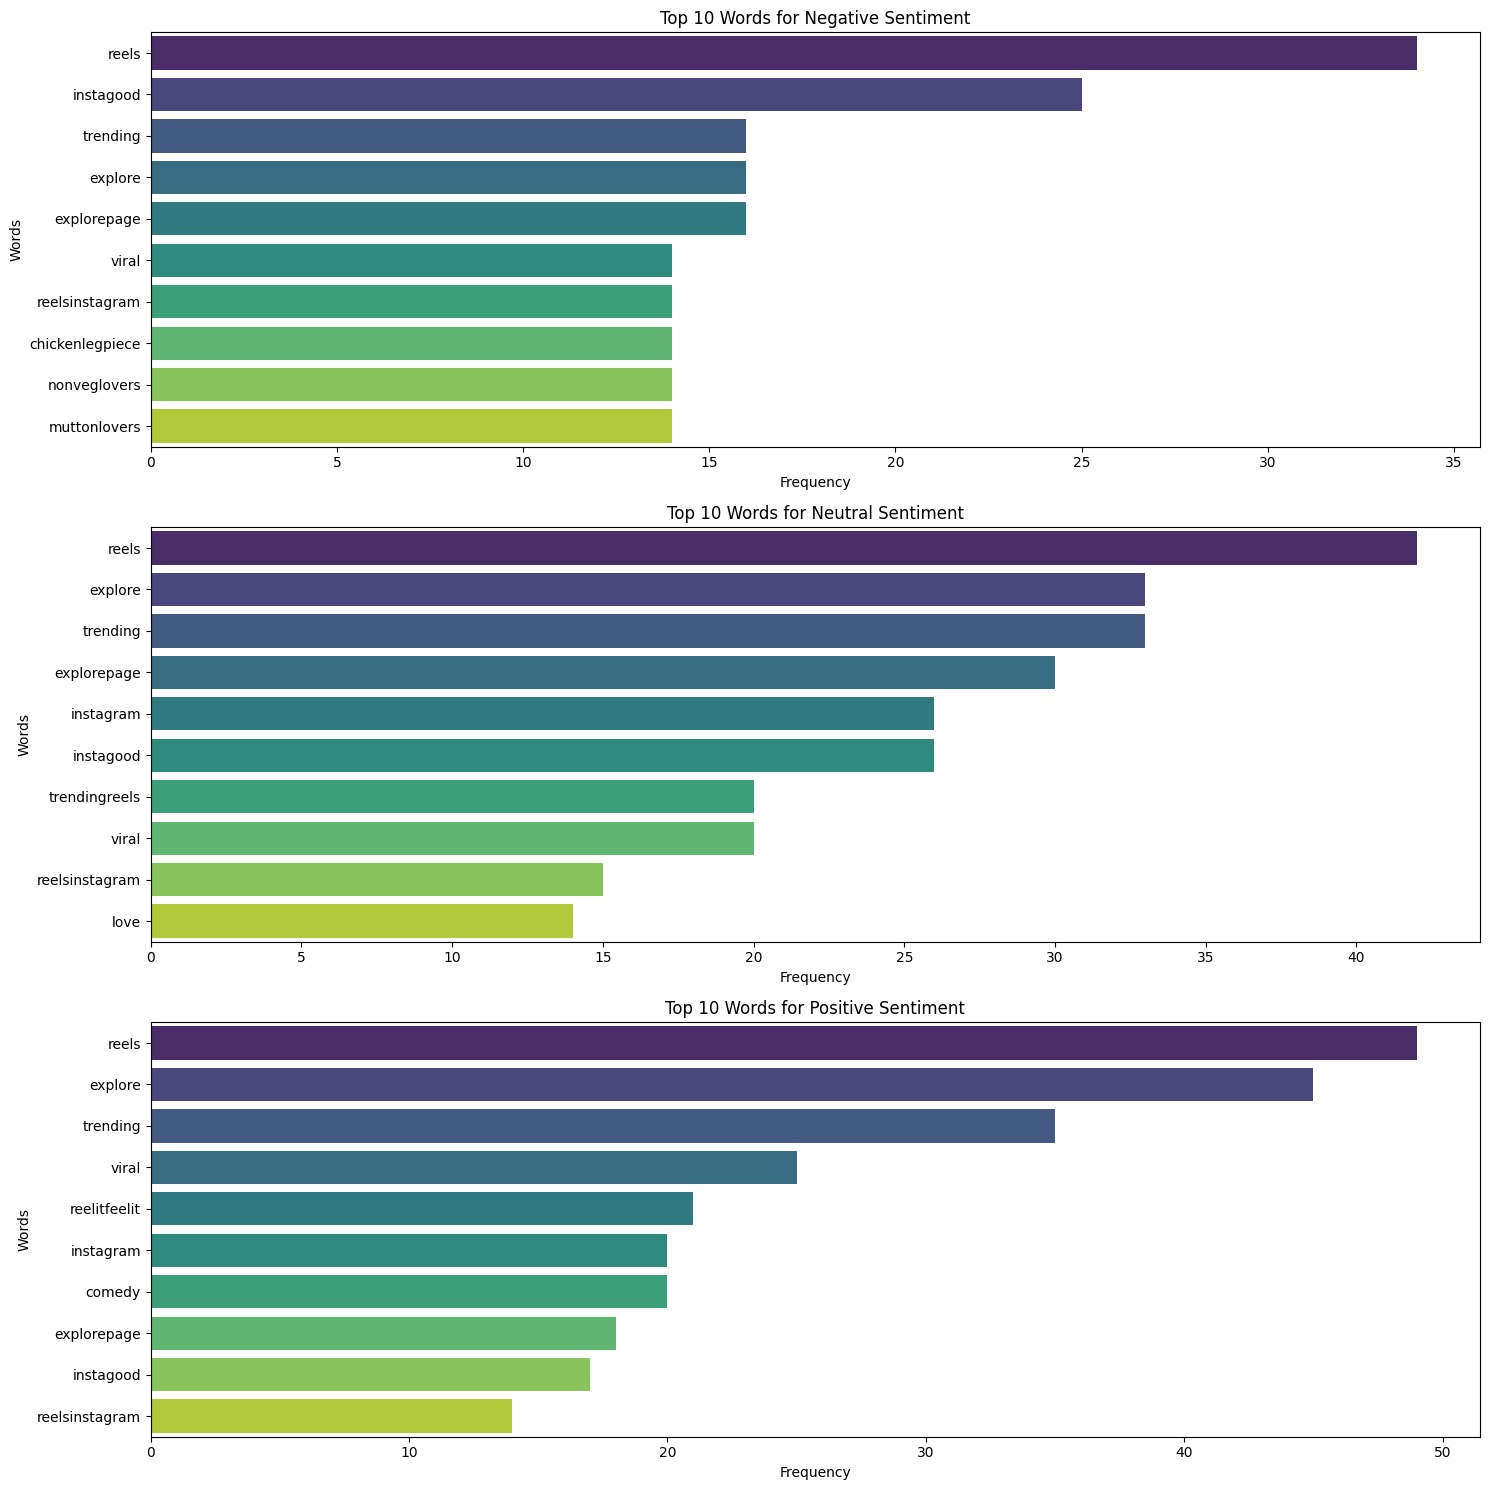

In [57]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15, 15))
for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
    top_words = get_top_n_words(df[df['sentiment'] == sentiment]['hashtags'])
    plt.subplot(3, 1, i+1)
    sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], hue=[word[0] for word in top_words], palette='viridis', legend=False)
    plt.title(f'Top 10 Words for {sentiment.capitalize()} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
plt.tight_layout()
plt.show()


Function to predict sentiment for new descriptions

In [58]:
def predict_sentiment(description):
    vectorized_description = vectorizer.transform([description])
    return model.predict(vectorized_description)[0]

# Example
example_descriptions = [
    "Amazing video! Love it!",
    "This is okay, nothing special.",
    "Terrible content, waste of time."
]

print("\nExample Predictions:")
for desc in example_descriptions:
    print(f"Description: '{desc}'")
    print(f"Predicted Sentiment: {predict_sentiment(desc)}\n")


Example Predictions:
Description: 'Amazing video! Love it!'
Predicted Sentiment: neutral

Description: 'This is okay, nothing special.'
Predicted Sentiment: positive

Description: 'Terrible content, waste of time.'
Predicted Sentiment: neutral

